In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import HTML, display
import seaborn as sns; sns.set()
from wordcloud import WordCloud

In [3]:
df=pd.read_csv("luxury_cosmetics_popups.csv")
df.head()

,event_id,brand,region,city,location_type,event_type,start_date,end_date,lease_length_days,sku,product_name,price_usd,avg_daily_footfall,units_sold,sell_through_pct
0,POP100282,Charlotte Tilbury,North America,Miami,Art/Design District,Flash Event,2024-02-25,2024-03-02,6,LE-UQYNQA1A,Charlotte Tilbury Glow Mascara,62.21,1107,3056,98.90
1,POP102014,Valentino Beauty,North America,New York,Airport Duty-Free,Flash Event,2024-03-17,2024-06-09,84,LE-9E9FTDSM,Valentino Beauty Pearl Eyeshadow Palette,77.93,1652,2782,86.32
2,POP101719,YSL Beauty,Europe,Berlin,Airport Duty-Free,Standalone Pop-Up,2025-02-26,2025-03-10,12,LE-W921CLUG,YSL Beauty Glow Eyeshadow Palette,149.91,752,2720,69.18
3,POP100994,Hermès Beauty,North America,Chicago,Airport Duty-Free,Standalone Pop-Up,2025-07-06,2025-08-04,29,LE-MPO4BX6H,Hermès Beauty Pearl Highlighter,80.32,1688,203,66.78
4,POP102033,Tom Ford Beauty,Europe,London,High-Street,Shop-in-Shop,2024-12-06,2024-12-25,19,LE-M3D94MYP,Tom Ford Beauty Noir Highlighter,56.15,1012,1292,80.10


In [4]:
df.shape

(2133, 15)

In [5]:
df.describe()

,lease_length_days,price_usd,avg_daily_footfall,units_sold,sell_through_pct
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,46.792780,96.562916,1407.105954,1937.404594,73.233788
std,25.315425,74.681231,542.245867,1101.797964,14.602901
min,3.000000,30.040000,439.000000,101.000000,39.500000
25%,25.000000,52.330000,989.000000,1024.000000,61.740000
50%,46.000000,68.360000,1323.000000,1839.000000,73.030000
75%,69.000000,106.370000,1763.000000,2731.000000,85.210000
max,90.000000,396.490000,3082.000000,4897.000000,100.000000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id            2133 non-null   object 
 1   brand               2133 non-null   object 
 2   region              2133 non-null   object 
 3   city                2086 non-null   object 
 4   location_type       2133 non-null   object 
 5   event_type          2133 non-null   object 
 6   start_date          2133 non-null   object 
 7   end_date            2097 non-null   object 
 8   lease_length_days   2133 non-null   int64  
 9   sku                 2133 non-null   object 
 10  product_name        2133 non-null   object 
 11  price_usd           2133 non-null   float64
 12  avg_daily_footfall  2133 non-null   int64  
 13  units_sold          2133 non-null   int64  
 14  sell_through_pct    2133 non-null   float64
dtypes: float64(2), int64(3), object(10)
memory usage: 250.1

In [7]:
df.isnull().sum()

event_id               0
brand                  0
region                 0
city                  47
location_type          0
event_type             0
start_date             0
end_date              36
lease_length_days      0
sku                    0
product_name           0
price_usd              0
avg_daily_footfall     0
units_sold             0
sell_through_pct       0
dtype: int64

In [8]:
# I will assign an "unknown" string for missing values in the city column
df['city'] = df['city'].fillna('Unknown')

In [9]:
df["start_date"] = pd.to_datetime(df["start_date"])
df["end_date"] = pd.to_datetime(df["end_date"])

In [10]:
df["end_date"] = df["end_date"].fillna(
    df["start_date"] + pd.to_timedelta(df["lease_length_days"], unit="D")
)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

event_id              0
brand                 0
region                0
city                  0
location_type         0
event_type            0
start_date            0
end_date              0
lease_length_days     0
sku                   0
product_name          0
price_usd             0
avg_daily_footfall    0
units_sold            0
sell_through_pct      0
dtype: int64

In [13]:
print("Location Type:", df['location_type'].unique().tolist())
print("Region:", df['region'].unique().tolist())

Location Type: ['Art/Design District', 'Airport Duty-Free', 'High-Street', 'Department Store Atrium', 'Luxury Mall']
Region: ['North America', 'Europe', 'Asia-Pacific', 'Latin America', 'Middle East']


In [14]:
print(df['price_usd'].describe(percentiles=[.25, .50, .75, .95]))

count    2133.000000
mean       96.562916
std        74.681231
min        30.040000
25%        52.330000
50%        68.360000
75%       106.370000
95%       276.856000
max       396.490000
Name: price_usd, dtype: float64


In [15]:
# Get some quick statistics using the describe() function
numeric_cols = ['price_usd', 'avg_daily_footfall', 'units_sold', 'sell_through_pct', 'lease_length_days']
print("\nSummary statistics for numeric columns:")
print(df[numeric_cols].describe())


Summary statistics for numeric columns:
         price_usd  avg_daily_footfall   units_sold  sell_through_pct  \
count  2133.000000         2133.000000  2133.000000       2133.000000   
mean     96.562916         1407.105954  1937.404594         73.233788   
std      74.681231          542.245867  1101.797964         14.602901   
min      30.040000          439.000000   101.000000         39.500000   
25%      52.330000          989.000000  1024.000000         61.740000   
50%      68.360000         1323.000000  1839.000000         73.030000   
75%     106.370000         1763.000000  2731.000000         85.210000   
max     396.490000         3082.000000  4897.000000        100.000000   

       lease_length_days  
count        2133.000000  
mean           46.792780  
std            25.315425  
min             3.000000  
25%            25.000000  
50%            46.000000  
75%            69.000000  
max            90.000000  


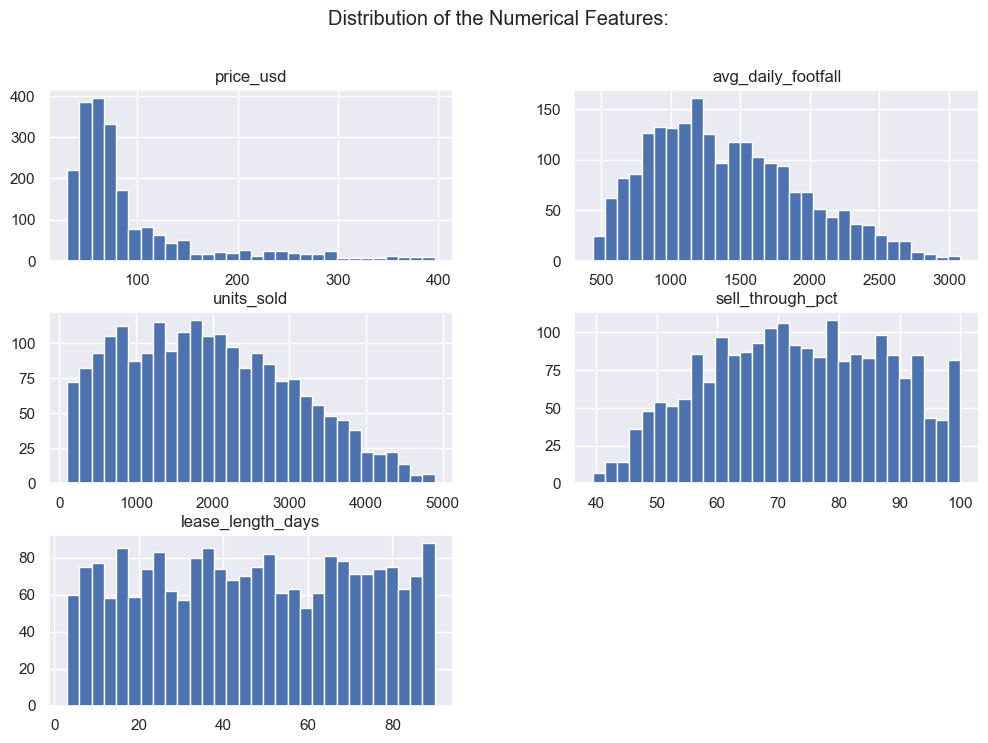

In [16]:
df[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution of the Numerical Features:")
plt.show()

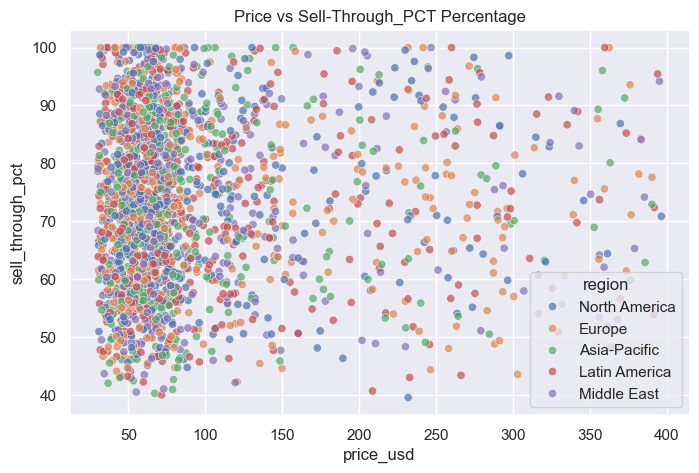

In [17]:
# Visualizing the relationship between price and sell-through-pct
plt.figure(figsize=(8, 5))
sns.scatterplot(x='price_usd', y='sell_through_pct', hue='region', data=df, alpha=0.7)
plt.title('Price vs Sell-Through_PCT Percentage')
plt.show()

In [18]:
df['revenue_usd'] = df['units_sold'] * df['price_usd']

In [19]:
top_brands = df.groupby('brand')['revenue_usd'].sum().sort_values(ascending=False).head(10)
print(top_brands)

brand
Estée Lauder          20959740.75
YSL Beauty            20394405.87
Sisley-Paris          19017497.29
Hourglass             18755973.53
Rare Beauty           18731476.96
Chanel                18028914.89
MAC Cosmetics         17970144.46
Clé de Peau Beauté    17931358.85
Valentino Beauty      17453900.28
Pat McGrath Labs      17208066.45
Name: revenue_usd, dtype: float64


In [20]:
top_cities = df.groupby('city')['avg_daily_footfall'].mean().sort_values(ascending=False).head(10)
print(top_cities)

city
Los Angeles    1527.125000
Seoul          1492.347222
Tokyo          1489.292135
Hong Kong      1455.537037
London         1454.986301
Berlin         1444.839506
Madrid         1436.947368
São Paulo      1426.348624
Jeddah         1422.901235
Milan          1421.605263
Name: avg_daily_footfall, dtype: float64


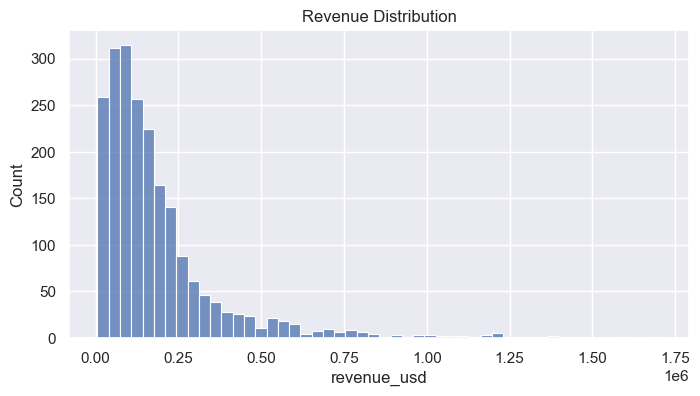

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(df['revenue_usd'].dropna(), bins=50)
plt.title("Revenue Distribution")
plt.show()

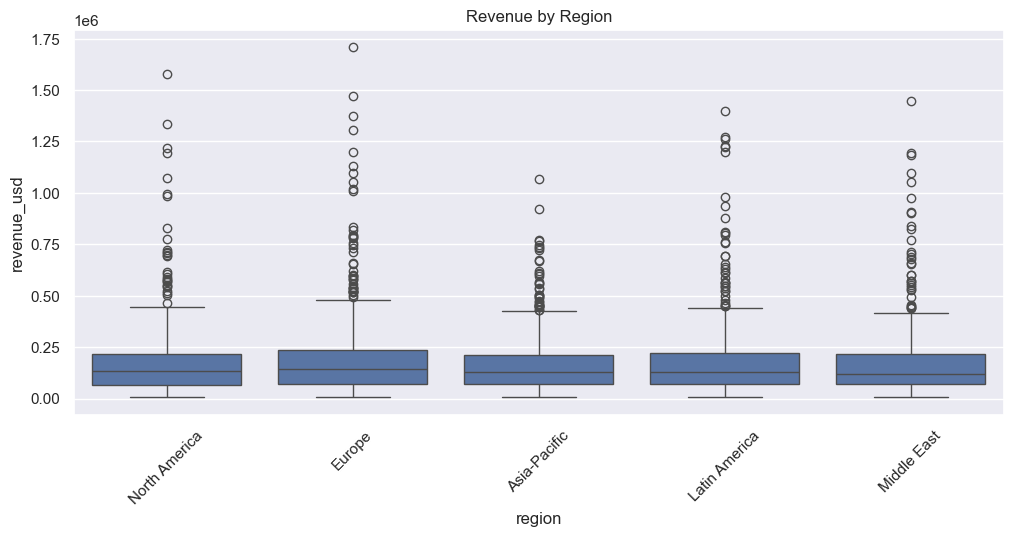

In [22]:
plt.figure(figsize=(12,5))
sns.boxplot(x='region', y='revenue_usd', data=df)
plt.xticks(rotation=45)
plt.title("Revenue by Region")
plt.show()

In [23]:
df['month'] = df['start_date'].dt.to_period('M')
monthly = df.groupby('month')['revenue_usd'].sum().reset_index()
monthly['month'] = monthly['month'].dt.to_timestamp()

In [24]:
# Month to datetime
df['month'] = pd.to_datetime(df['start_date'].dt.to_period('M').astype(str))

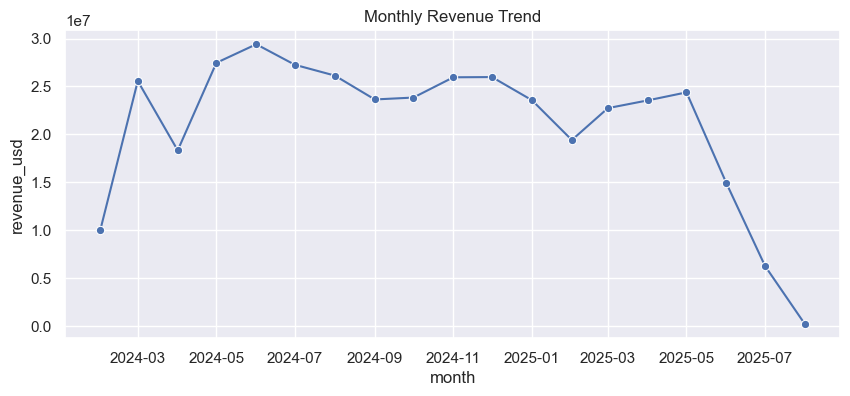

In [25]:
plt.figure(figsize=(10,4))
sns.lineplot(data=monthly, x='month', y='revenue_usd', marker='o')
plt.title("Monthly Revenue Trend")
plt.show()

In [26]:
# Group by month
monthly_units = df.groupby('month')['units_sold'].sum().reset_index()

In [27]:
# Estimate total footfall
df['total_footfall'] = df['avg_daily_footfall'] * df['lease_length_days']

In [28]:
# Conversion rate = units_sold / total footfall
df['conversion_est'] = df['units_sold'] / df['total_footfall']

In [29]:
location_analysis = df.groupby('city').agg({
    'total_footfall':'sum',
    'units_sold':'sum',
    'revenue_usd':'sum',
    'conversion_est':'mean'
}).sort_values('revenue_usd', ascending=False)
print(location_analysis.head(10))

           total_footfall  units_sold  revenue_usd  conversion_est
city                                                              
São Paulo         7292234      208843  24100697.18        0.062742
Paris             6163588      191036  21879403.50        0.065239
Hong Kong         8377520      218707  19200495.72        0.047226
Riyadh            6071832      178975  18597542.14        0.067699
Lima              5075562      171904  18313535.57        0.094604
Milan             4855560      150035  18148380.62        0.050960
Jeddah            5916492      159773  17699194.38        0.043833
Madrid            6447062      180921  16853833.15        0.056232
Toronto           4708472      158303  16463183.51        0.079244
Singapore         6084609      174529  15916046.75        0.056357


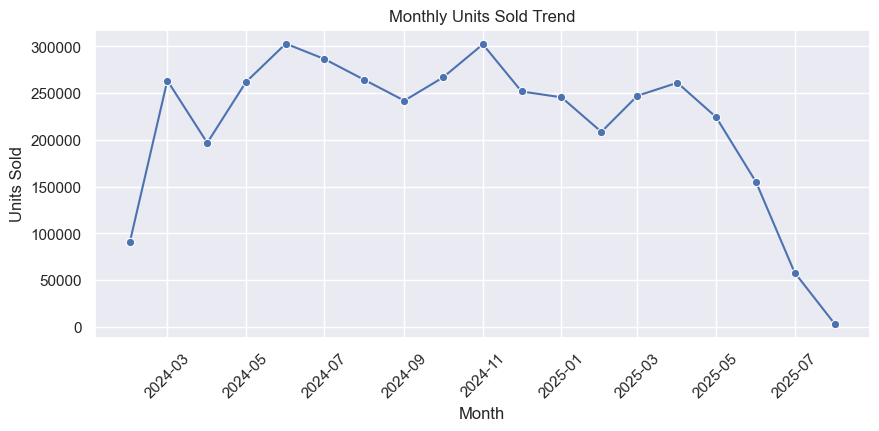

In [30]:
# Plot
plt.figure(figsize=(10,4))
sns.lineplot(data=monthly_units, x='month', y='units_sold', marker='o')
plt.title("Monthly Units Sold Trend")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.show()

In [31]:
# Revenue per day
df['revenue_per_day'] = df['revenue_usd'] / df['lease_length_days']

In [32]:
# Price quartile bucket
df['price_quartile'] = pd.qcut(df['price_usd'], 4, labels=['Q1','Q2','Q3','Q4'])

In [33]:
# High sell-through flag
df['high_sell_through'] = (df['sell_through_pct'] > df['sell_through_pct'].median()).astype(int)

In [34]:
top_events = df.sort_values('revenue_per_day', ascending=False)[['event_id','brand','city','revenue_per_day']]
print(top_events.head(10))  # Show top 10 events

       event_id             brand          city  revenue_per_day
859   POP100327   Tom Ford Beauty          Lima    305781.300000
1964  POP101980      Estée Lauder         Paris    188889.750000
833   POP100006      Estée Lauder        Berlin    177240.413333
2118  POP100955     Armani Beauty  Buenos Aires    159201.470000
954   POP101953  Valentino Beauty       Toronto    152396.970000
1755  POP100699     Armani Beauty         Paris    113749.742857
1835  POP101445        YSL Beauty      New York    108622.609091
38    POP100306      Sisley-Paris        Jeddah    101726.591429
1621  POP101770          Guerlain       Toronto     90567.170909
953   POP101057  Pat McGrath Labs     São Paulo     87944.018571


In [35]:
city_revenue = df.groupby('city')['revenue_per_day'].mean().sort_values(ascending=False)
print(city_revenue)

city
Lima            11712.493549
Toronto         10197.702156
Paris            9713.383709
Berlin           8825.578898
Chicago          8610.712787
São Paulo        8487.791986
Miami            8160.838738
Buenos Aires     8047.021556
New York         7743.617483
Los Angeles      7095.605893
London           6903.316958
Milan            6737.821661
Riyadh           6712.820083
Shanghai         6643.428399
Jeddah           6311.749940
Madrid           5903.777063
Unknown          5873.106472
Singapore        5852.857108
Mexico City      5730.889898
Abu Dhabi        5526.250114
Seoul            5465.785049
Tokyo            5396.891767
Bogotá           5353.650379
Dubai            5152.924065
Doha             5144.097856
Hong Kong        5053.440169
Name: revenue_per_day, dtype: float64


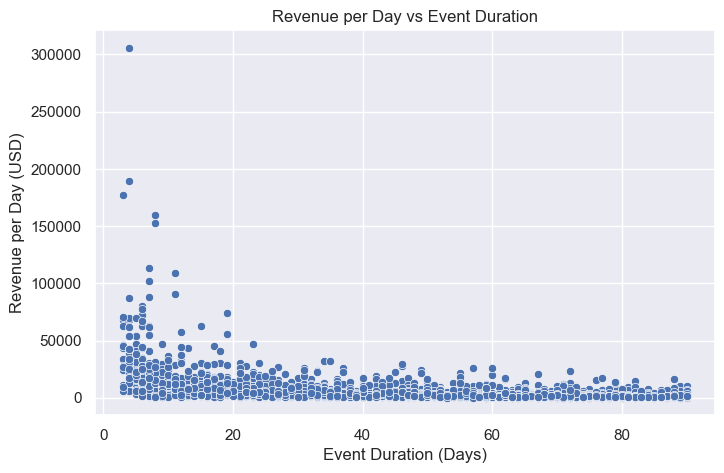

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='lease_length_days', y='revenue_per_day', data=df)
plt.title("Revenue per Day vs Event Duration")
plt.xlabel("Event Duration (Days)")
plt.ylabel("Revenue per Day (USD)")
plt.show()

In [37]:
price_revenue = df.groupby('price_quartile', observed=False)['revenue_per_day'].mean()
print(price_revenue)

price_quartile
Q1     3173.559187
Q2     4887.389638
Q3     6145.034431
Q4    13995.412170
Name: revenue_per_day, dtype: float64


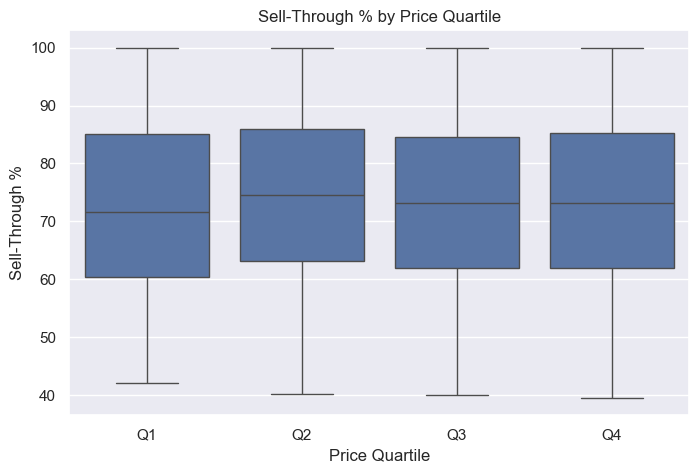

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x='price_quartile', y='sell_through_pct', data=df)
plt.title("Sell-Through % by Price Quartile")
plt.xlabel("Price Quartile")
plt.ylabel("Sell-Through %")
plt.show()

In [39]:
region_price = df.groupby(['region','price_quartile'], observed=False)['revenue_per_day'].mean().unstack()
print(region_price)

price_quartile           Q1           Q2           Q3            Q4
region                                                             
Asia-Pacific    2630.983276  3838.645620  6005.728538  10987.352544
Europe          3661.324592  4257.557140  5457.985629  15732.059451
Latin America   2739.203076  4805.721630  6629.750867  17011.894070
Middle East     3308.902607  4874.198145  4919.849773   9737.786576
North America   3615.873462  6494.784065  7754.805310  15677.765044


In [40]:
success_city = df.groupby(['city','high_sell_through']).size().unstack()
print(success_city)

high_sell_through   0   1
city                     
Abu Dhabi          37  41
Berlin             44  37
Bogotá             43  37
Buenos Aires       47  43
Chicago            44  37
Doha               37  44
Dubai              37  43
Hong Kong          52  56
Jeddah             40  41
Lima               44  42
London             36  37
Los Angeles        29  43
Madrid             54  41
Mexico City        42  37
Miami              38  48
Milan              39  37
New York           42  32
Paris              49  45
Riyadh             45  48
Seoul              37  35
Shanghai           34  33
Singapore          37  48
São Paulo          52  57
Tokyo              46  43
Toronto            39  37
Unknown            23  24


In [41]:
brand_success = df.groupby('brand')['high_sell_through'].mean().sort_values(ascending=False)
print(brand_success)

brand
Shiseido              0.597826
Sisley-Paris          0.583333
Fenty Beauty          0.576923
Hourglass             0.556818
Armani Beauty         0.555556
NARS                  0.546667
Bobbi Brown           0.533333
Valentino Beauty      0.521277
Tom Ford Beauty       0.517647
Lancôme               0.516484
La Prairie            0.507042
Dior                  0.500000
Rare Beauty           0.500000
Hermès Beauty         0.493827
Estée Lauder          0.471910
YSL Beauty            0.470588
Pat McGrath Labs      0.466667
Huda Beauty           0.466667
Clé de Peau Beauté    0.464646
Givenchy Beauty       0.452381
Charlotte Tilbury     0.440860
Guerlain              0.437500
MAC Cosmetics         0.428571
Chanel                0.411765
Name: high_sell_through, dtype: float64


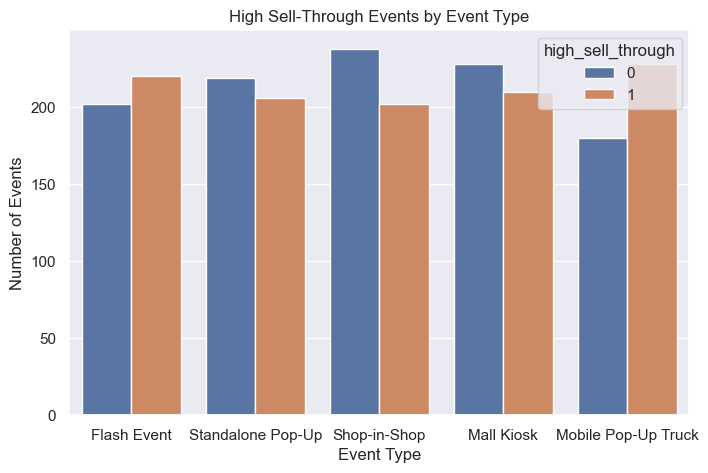

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(x='event_type', hue='high_sell_through', data=df)
plt.title("High Sell-Through Events by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Number of Events")
plt.show()

In [43]:
combined = df.groupby(['city','price_quartile','high_sell_through'], observed=False)['revenue_per_day'].mean().reset_index()
print(combined.sort_values('revenue_per_day', ascending=False).head(10))

             city price_quartile  high_sell_through  revenue_per_day
79           Lima             Q4                  1     40197.435232
199       Toronto             Q4                  1     35018.947108
135      New York             Q4                  1     34518.170819
143         Paris             Q4                  1     27639.269436
14         Berlin             Q4                  0     24615.216799
38        Chicago             Q4                  0     20322.810299
31   Buenos Aires             Q4                  1     18585.206371
198       Toronto             Q4                  0     18223.537689
102        Madrid             Q4                  0     17927.567303
181     São Paulo             Q3                  1     17255.489335


In [44]:
# Features for modeling
features = ['brand','region','city','location_type','event_type','lease_length_days',
            'avg_daily_footfall','price_usd','price_quartile','revenue_per_day','month']

# Regression target
target_reg = 'units_sold'

# Classification target
target_clf = 'high_sell_through'

# Convert month to numeric for modeling
df['month'] = df['start_date'].dt.month

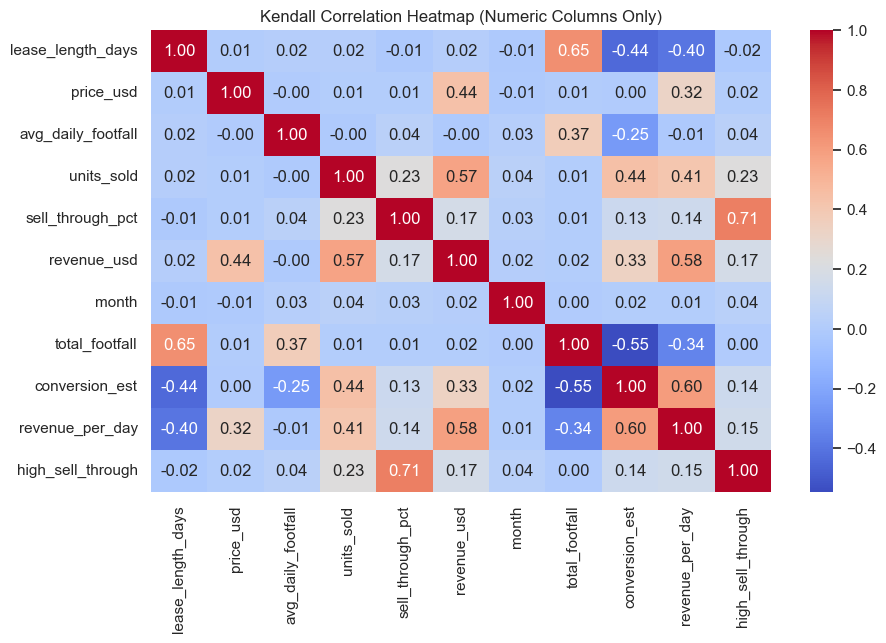

In [45]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Compute Kendall correlation
corr = df[numeric_cols].corr(method='kendall')

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Kendall Correlation Heatmap (Numeric Columns Only)")
plt.show()

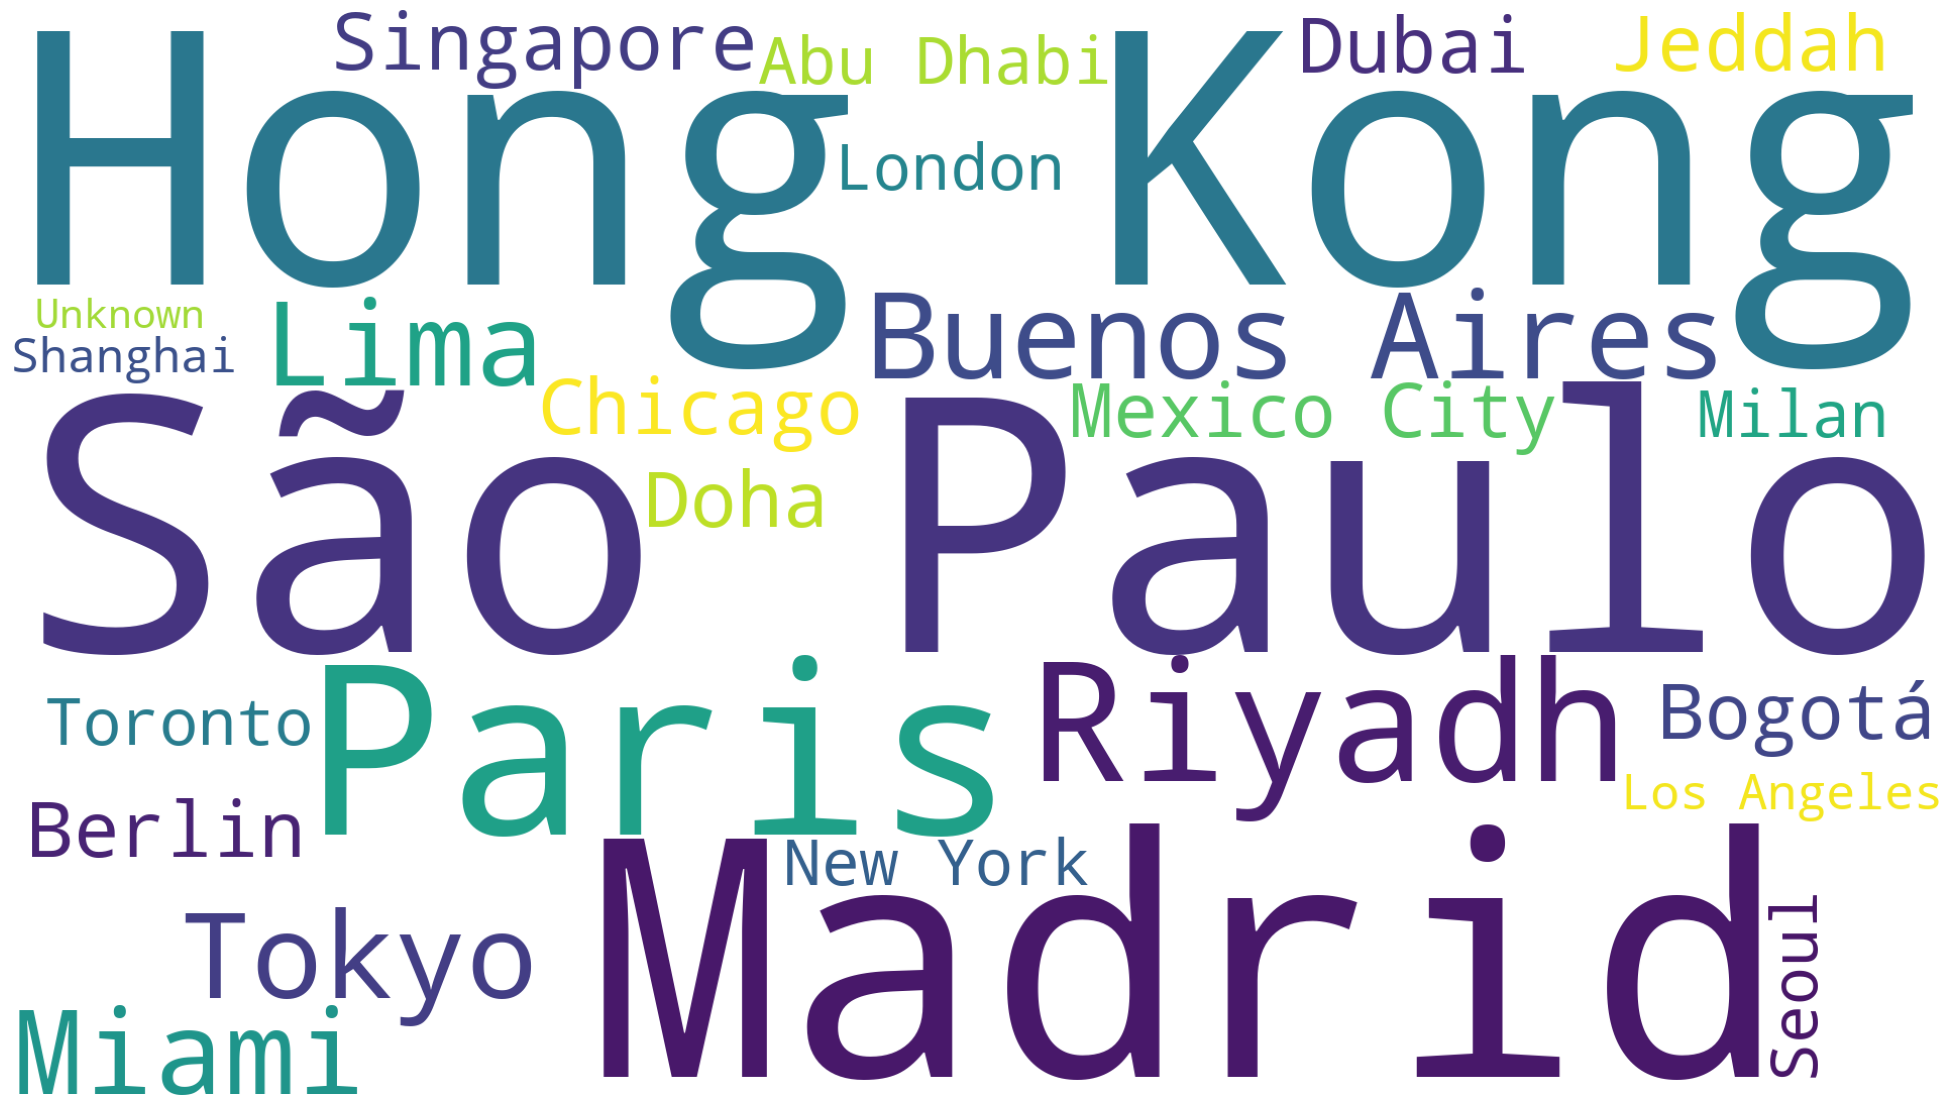

In [46]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud( 
    background_color='white',
    width=1920,
    height=1080,
    ).generate(" ".join(df.city))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('city.png')
plt.show()

In [47]:
df.head()

,event_id,brand,region,city,location_type,event_type,start_date,end_date,lease_length_days,sku,...,avg_daily_footfall,units_sold,sell_through_pct,revenue_usd,month,total_footfall,conversion_est,revenue_per_day,price_quartile,high_sell_through
0,POP100282,Charlotte Tilbury,North America,Miami,Art/Design District,Flash Event,2024-02-25,2024-03-02,6,LE-UQYNQA1A,...,1107,3056,98.90,190113.76,2,6642,0.460102,31685.626667,Q2,1
1,POP102014,Valentino Beauty,North America,New York,Airport Duty-Free,Flash Event,2024-03-17,2024-06-09,84,LE-9E9FTDSM,...,1652,2782,86.32,216801.26,3,138768,0.020048,2580.967381,Q3,1
2,POP101719,YSL Beauty,Europe,Berlin,Airport Duty-Free,Standalone Pop-Up,2025-02-26,2025-03-10,12,LE-W921CLUG,...,752,2720,69.18,407755.20,2,9024,0.301418,33979.600000,Q4,0
3,POP100994,Hermès Beauty,North America,Chicago,Airport Duty-Free,Standalone Pop-Up,2025-07-06,2025-08-04,29,LE-MPO4BX6H,...,1688,203,66.78,16304.96,7,48952,0.004147,562.240000,Q3,0
4,POP102033,Tom Ford Beauty,Europe,London,High-Street,Shop-in-Shop,2024-12-06,2024-12-25,19,LE-M3D94MYP,...,1012,1292,80.10,72545.80,12,19228,0.067194,3818.200000,Q2,1


In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event_id            2133 non-null   object        
 1   brand               2133 non-null   object        
 2   region              2133 non-null   object        
 3   city                2133 non-null   object        
 4   location_type       2133 non-null   object        
 5   event_type          2133 non-null   object        
 6   start_date          2133 non-null   datetime64[ns]
 7   end_date            2133 non-null   datetime64[ns]
 8   lease_length_days   2133 non-null   int64         
 9   sku                 2133 non-null   object        
 10  product_name        2133 non-null   object        
 11  price_usd           2133 non-null   float64       
 12  avg_daily_footfall  2133 non-null   int64         
 13  units_sold          2133 non-null   int64       

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

# Ignore FutureWarning for mean_squared_error(squared=False)
warnings.filterwarnings("ignore", category=FutureWarning)

# Drop rows with missing target
df_reg = df[features + [target_reg]].dropna()

X = df_reg[features]
y = df_reg[target_reg]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate numeric and categorical features
numeric_features = ['lease_length_days','avg_daily_footfall','price_usd','revenue_per_day','month']
categorical_features = ['brand','region','city','location_type','event_type','price_quartile']

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Regression pipeline
reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

# Train model
reg_pipeline.fit(X_train, y_train)

# Predict
y_pred = reg_pipeline.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)
print("R2:", r2_score(y_test, y_pred))

MAE: 190.81467213114752
RMSE: 285.7365667907183
R2: 0.9325780273099368


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing target
df_clf = df[features + [target_clf]].dropna()

X = df_clf[features]
y = df_clf[target_clf]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification pipeline (reuse preprocessor)
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Train model
clf_pipeline.fit(X_train, y_train)

# Predict
y_pred_clf = clf_pipeline.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_clf))
print(classification_report(y_test, y_pred_clf))

Accuracy: 0.5550351288056206
              precision    recall  f1-score   support

           0       0.51      0.65      0.57       195
           1       0.62      0.48      0.54       232

    accuracy                           0.56       427
   macro avg       0.56      0.56      0.55       427
weighted avg       0.57      0.56      0.55       427



In [51]:
# Feature importance for regression
importances = reg_pipeline.named_steps['regressor'].feature_importances_

# Get feature names after one-hot encoding
cat_names = reg_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(cat_names)

feature_importance = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)
print(feature_importance.head(20))

revenue_per_day                          0.538003
lease_length_days                        0.203967
price_usd                                0.198641
avg_daily_footfall                       0.009589
month                                    0.006421
location_type_Luxury Mall                0.001739
region_Latin America                     0.001708
location_type_Department Store Atrium    0.001572
event_type_Mobile Pop-Up Truck           0.001528
event_type_Shop-in-Shop                  0.001485
event_type_Flash Event                   0.001478
region_Asia-Pacific                      0.001450
region_North America                     0.001329
event_type_Mall Kiosk                    0.001231
region_Middle East                       0.001209
location_type_Airport Duty-Free          0.001196
event_type_Standalone Pop-Up             0.001188
location_type_High-Street                0.001060
price_quartile_Q1                        0.000942
region_Europe                            0.000932
